# **Categorical Data**

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('big_data.csv')[['GarageQual','FireplaceQu', 'SalePrice']]
df.head()

,GarageQual,FireplaceQu,SalePrice
0,TA,NaN,208500
1,TA,TA,181500
2,TA,TA,223500
3,TA,Gd,140000
4,TA,TA,250000


In [11]:
df.isna().mean()

GarageQual     0.055479
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [12]:
x = df.copy()
y = df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train['GarageQual_imputed'] = x_train['GarageQual']
x_train['FireplaceQu_imputed'] = x_train['FireplaceQu']

x_test['GarageQual_imputed'] = x_test['GarageQual']
x_test['FireplaceQu_imputed'] = x_test['FireplaceQu']

### **Type 1**

In [13]:
x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isna()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isna().sum()).values
x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isna()] = x_test['GarageQual'].dropna().sample(x_test['GarageQual'].isna().sum()).values

x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isna()] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isna().sum()).values
x_test['FireplaceQu_imputed'][x_test['FireplaceQu_imputed'].isna()] = x_test['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isna().sum()).values




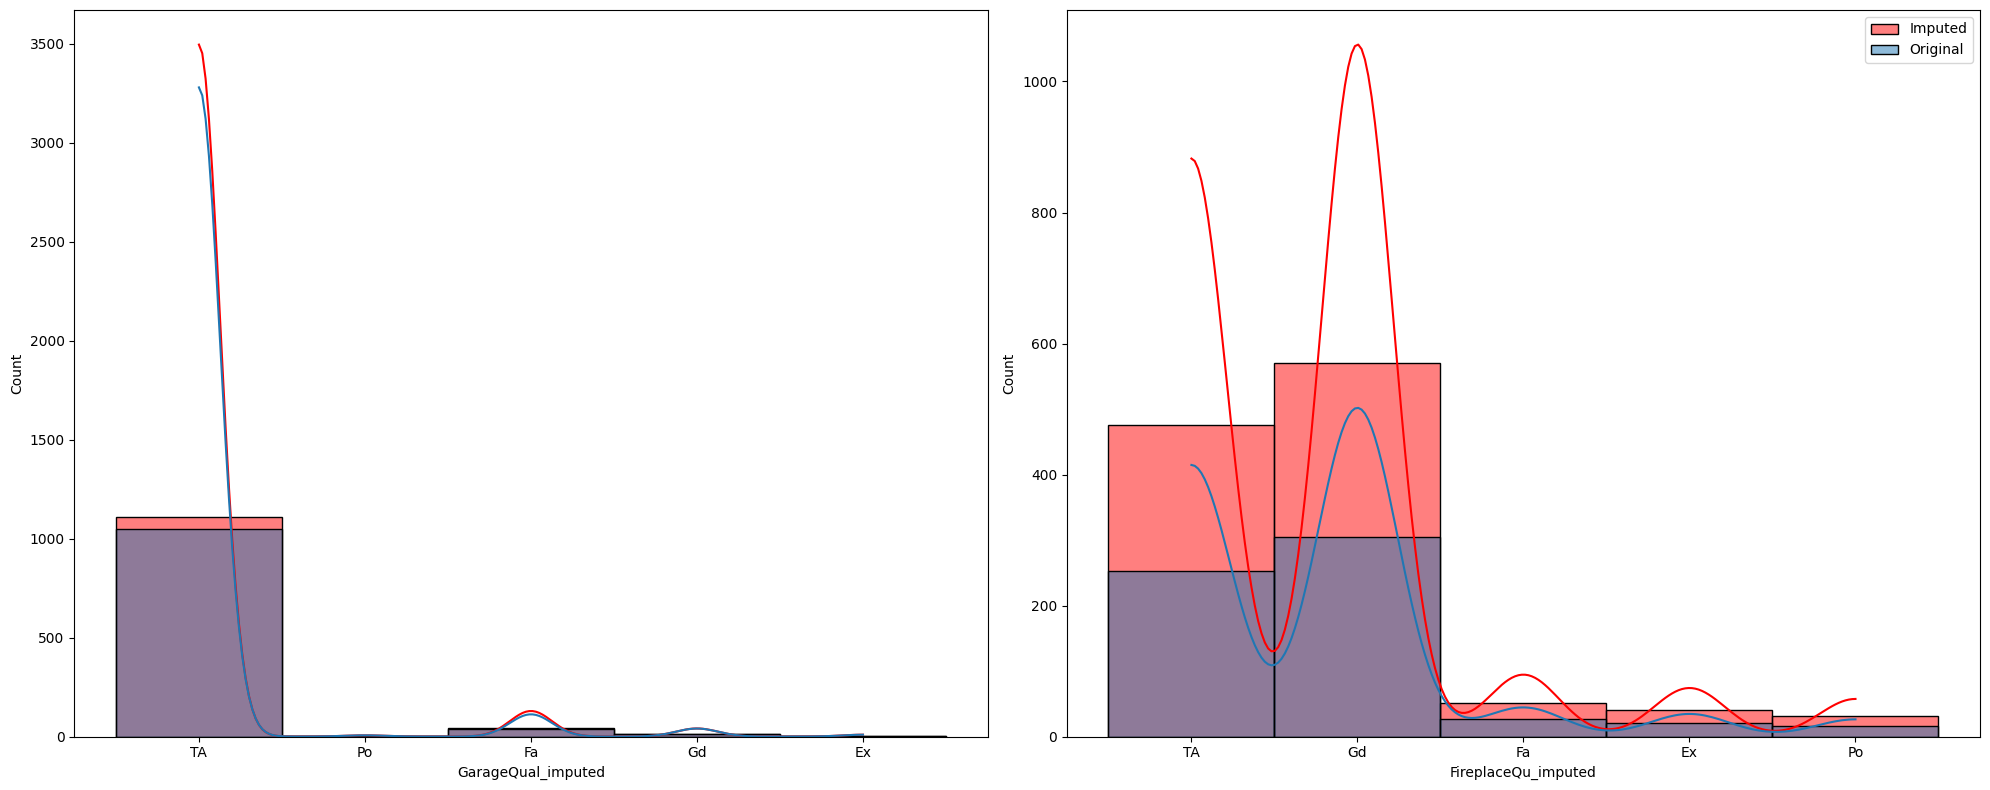

In [14]:
plt.figure(figsize=(20,8))

plt.subplot(121)
sns.histplot(x_train['GarageQual_imputed'], label='Imputed', color='r', kde=True)
sns.histplot(x_train['GarageQual'], label='Original', kde=True)

plt.subplot(122)
sns.histplot(x_train['FireplaceQu_imputed'], label='Imputed', color='r', kde=True)
sns.histplot(x_train['FireplaceQu'], label='Original', kde=True)

plt.legend()
plt.tight_layout()
plt.show()

### **Type 2**

In [15]:
x_train['GarageQual_imputed'] = x_train.apply(
    lambda row: x_train['GarageQual'].dropna().sample(1, random_state=int(row['SalePrice'])).values[0] 
    if pd.isna(row['GarageQual']) else row['GarageQual'],
    axis=1
)
x_test['GarageQual_imputed'] = x_test.apply(
    lambda row: x_train['GarageQual'].dropna().sample(1, random_state=int(row['SalePrice'])).values[0] 
    if pd.isna(row['GarageQual']) else row['GarageQual'],
    axis=1
)


x_train['FireplaceQu_imputed'] = x_train.apply(
    lambda row: x_train['FireplaceQu'].dropna().sample(1, random_state=int(row['SalePrice'])).values[0] 
    if pd.isna(row['FireplaceQu']) else row['FireplaceQu'],
    axis=1
)
x_test['FireplaceQu_imputed'] = x_test.apply(
    lambda row: x_train['FireplaceQu'].dropna().sample(1, random_state=int(row['SalePrice'])).values[0] 
    if pd.isna(row['FireplaceQu']) else row['FireplaceQu'],
    axis=1
)



### Why we used `SalePrice` as the Random Seed
In **Type 2 (Deterministic Imputation)**, we need to ensure that the same observation always gets the same imputed value, even if we run the code multiple times. To do this, we use a specific feature of that observation as the `random_state` seed.
We chose **`SalePrice`** for three key reasons:
1.  **It is Numerical:** The `random_state` parameter in Python requires an **integer** (number). `SalePrice` is already a number (e.g., 208500), so we can pass it directly. Categorical columns like `FireplaceQu` (e.g., 'Gd', 'TA') cannot be used as seeds without complex conversion.
2.  **It is Unique/Variable:** `SalePrice` varies significantly between houses. This ensures that different houses get different "random" values, preserving the randomness of the distribution. If we used a column with few unique values (like `YrSold`), many rows would get the exact same imputed value, which would distort the data.
3.  **It has No Missing Values:** `SalePrice` is complete (0% missing). If we used a column that had missing values itself (like `FireplaceQu`), we couldn't use it as a seed for those rows.

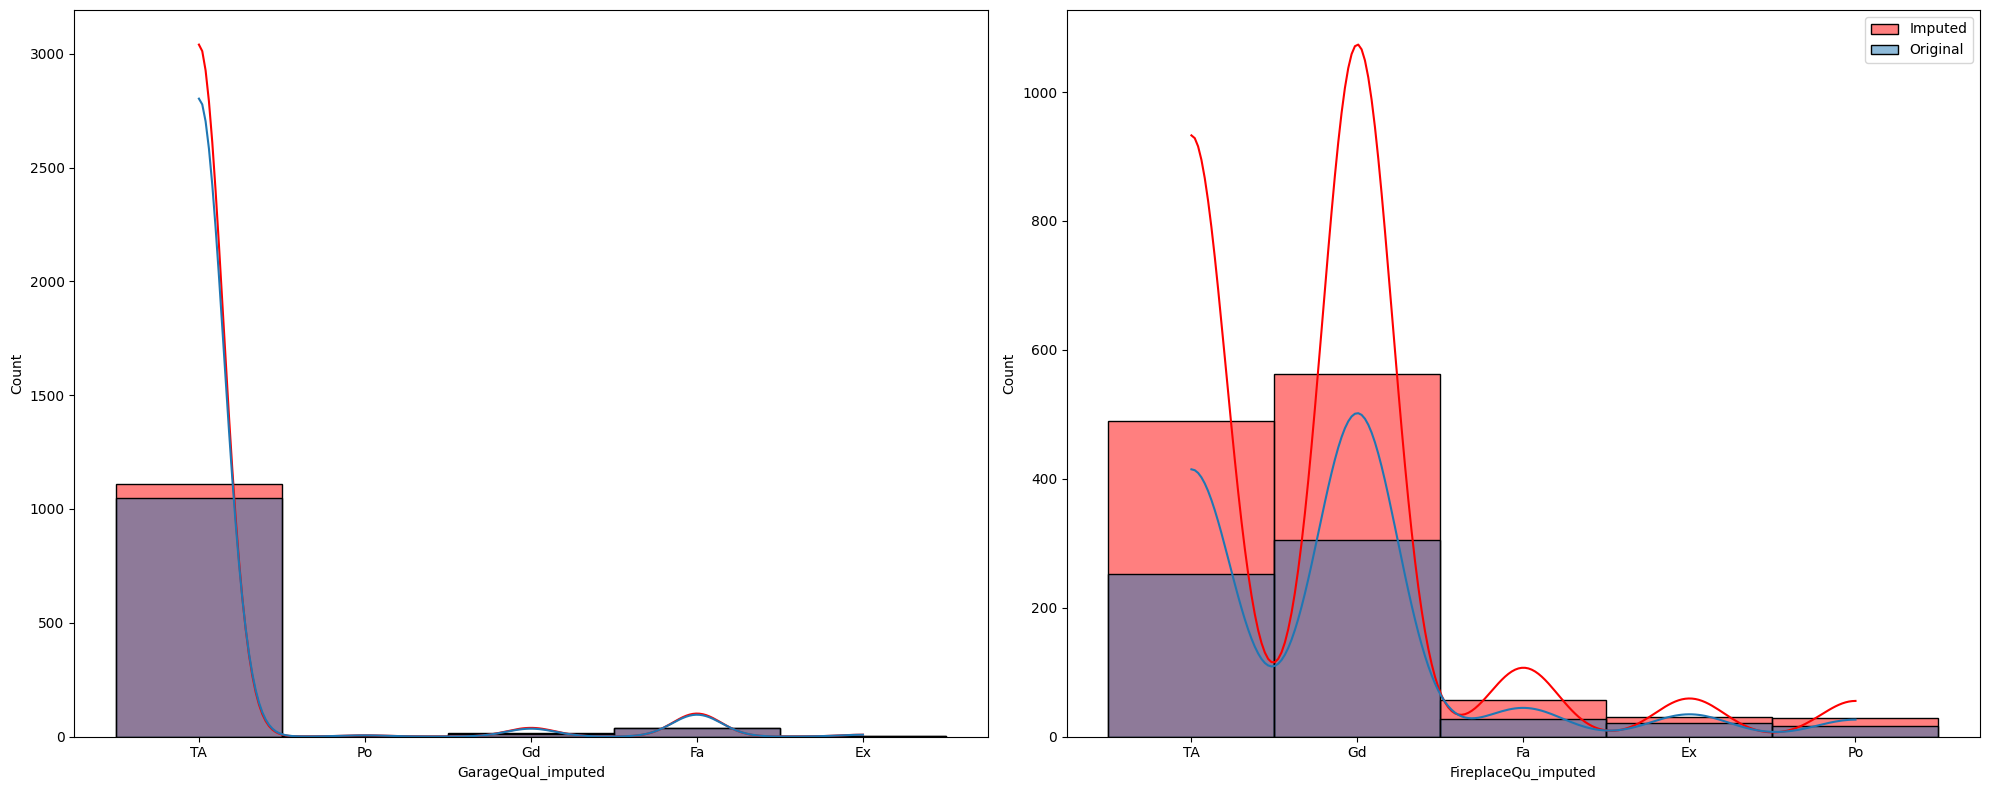

In [16]:
plt.figure(figsize=(20,8))

plt.subplot(121)
sns.histplot(x_train['GarageQual_imputed'], label='Imputed', color='r', kde=True)
sns.histplot(x_train['GarageQual'], label='Original', kde=True)

plt.subplot(122)
sns.histplot(x_train['FireplaceQu_imputed'], label='Imputed', color='r', kde=True)
sns.histplot(x_train['FireplaceQu'], label='Original', kde=True)

plt.legend()
plt.tight_layout()
plt.show()